## The Big 5 Personality Test

#### The Big Five personality test, or Five-Factor Model (FFM), is a widely accepted, evidence-based psychological assessment that measures five core dimensions of human personality: Openness, Conscientiousness, Extraversion, Agreeableness, and Neuroticism (OCEAN). It uses self-report questionnaires to evaluate traits on a spectrum, commonly used for hiring, counseling, and self-discovery. 


We took the Big 5 Personality Test in our class and these are the results I got!

![](img/big_5.png) 

## Initial motivation

### When I received my own results, I was surprised. My agreeableness score was very high, which felt accurate, but my emotional stability (the inverse of neuroticism) was much more average than I expected. I had always assumed that being more agreeable would naturally mean being emotionally calmer.

### That assumption made me curious about whether this relationship showed up in other people’s results as well, or if it was just something I noticed in myself.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
class_big5_df = pd.read_csv("class_big5_data.csv", sep="\t")

# Fix delimiter if needed
if len(class_big5_df.columns) == 1:
    class_big5_df = pd.read_csv("class_big5_data.csv")

big5_df = pd.read_csv("openpsych_data.csv", sep="\t")


In [12]:
class_scored_df = class_big5_df.copy()

# Class trait order
roman_map = {
    "I": "O",
    "II": "C",
    "III": "E",
    "IV": "A",
    "V": "ES"  # Emotional Stability
}

for r, t in roman_map.items():
    class_scored_df[t] = pd.to_numeric(class_scored_df[r], errors="coerce")

# Convert Emotional Stability → Neuroticism
es = class_scored_df["ES"]
class_scored_df["N"] = (es.max() + es.min()) - es

class_scored_df[["A", "N"]].head()


,A,N
0,97.0,1.0
1,93.0,38.0
2,89.0,14.0
3,96.0,63.0
4,76.0,9.0


I started by looking at our class data to see whether the relationship I noticed in my own scores appeared among my classmates as well.

If high agreeableness truly leads to lower neuroticism, I would expect to see a clear negative relationship between the two traits.


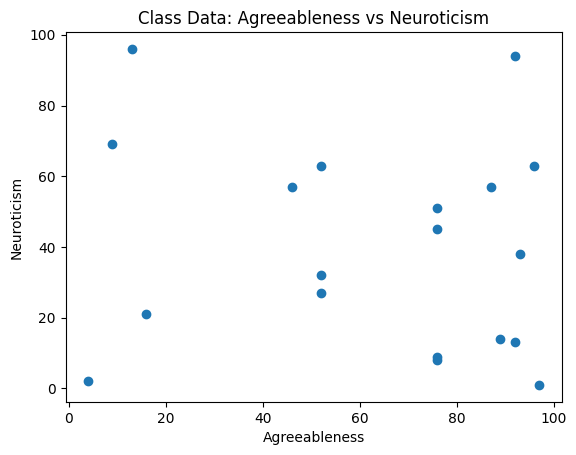

np.float64(-0.13316302756818466)

In [13]:
plt.figure()
plt.scatter(class_scored_df["A"], class_scored_df["N"])
plt.xlabel("Agreeableness")
plt.ylabel("Neuroticism")
plt.title("Class Data: Agreeableness vs Neuroticism")
plt.show()

class_corr = class_scored_df["A"].corr(class_scored_df["N"])
class_corr


Within our class, the relationship between agreeableness and neuroticism is not especially strong. While some students with high agreeableness do score lower in neuroticism, many do not.

This suggests that my experience was not unique, but it also raised the question of whether this pattern holds in a much larger dataset.

In [14]:
def score_trait(df, prefix):
    cols = [f"{prefix}{i}" for i in range(1, 11)]
    return df[cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)

big5_scored_df = big5_df.copy()
big5_scored_df["A"] = score_trait(big5_scored_df, "A")
big5_scored_df["N"] = score_trait(big5_scored_df, "N")

## Testing the idea in a larger dataset

To explore this further, I looked at the OpenPsych Big Five dataset, which includes responses from nearly 20,000 people. With a dataset this large, any strong relationship between agreeableness and neuroticism should be easier to detect.

However, the results were similar to what I saw in our class. Even at scale, the correlation between agreeableness and neuroticism was weak. Many people who scored high in agreeableness still reported relatively high levels of neuroticism.

This suggests that being more agreeable does not consistently correspond to being less emotionally reactive or anxious.

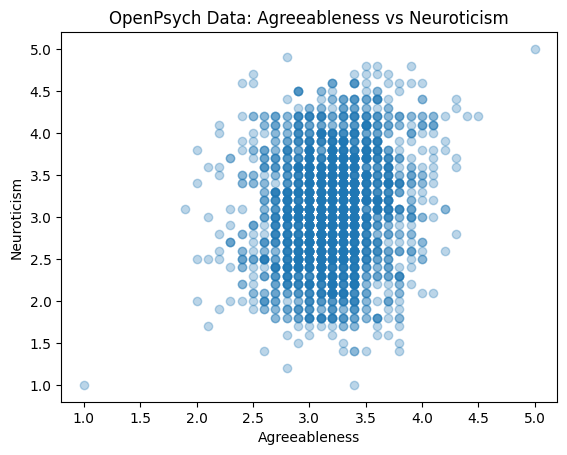

np.float64(0.18144744927195994)

In [15]:
sample = big5_scored_df[["A", "N"]].dropna().sample(2500, random_state=42)

plt.figure()
plt.scatter(sample["A"], sample["N"], alpha=0.3)
plt.xlabel("Agreeableness")
plt.ylabel("Neuroticism")
plt.title("OpenPsych Data: Agreeableness vs Neuroticism")
plt.show()

full_corr = big5_scored_df["A"].corr(big5_scored_df["N"])
full_corr


#### Even with a much larger sample size, the relationship between agreeableness and neuroticism remains weak. High agreeableness does not consistently predict low neuroticism.

#### This challenges the assumption that being more cooperative or empathetic automatically translates into emotional stability.


## Narrowing the analysis by gender

I then narrowed the analysis by gender to see if the relationship between agreeableness and neuroticism differed across groups. While average levels of each trait varied slightly, the overall relationship remained weak regardless of gender.

This indicates that the lack of a strong correlation is not driven by gender differences in the dataset.

In [16]:
gender_map = {1: "male", 2: "female", 3: "other"}
big5_scored_df["gender_cat"] = big5_scored_df["gender"].map(gender_map)

big5_scored_df.groupby("gender_cat")[["A", "N"]].corr().unstack().iloc[:, 1]


gender_cat
female    0.142175
male      0.219107
other     0.310406
Name: (A, N), dtype: float64

## Conclusion

#### Based on my own results, our class data, and a much larger dataset, there is little evidence that high agreeableness leads to low neuroticism. While agreeableness is often seen as a positive or socially desirable trait, it does not appear to offer consistent protection against emotional instability.

#### This analysis challenged an assumption I didn’t realize I had, and it was a reminder that personality traits describe tendencies rather than outcomes. Even traits that seem intuitively connected do not always behave that way in real data.